# Importing Packages

In [4]:
import os
import glob
import numpy as np
from tensorflow.keras import layers
from tensorflow import keras 
import tensorflow as tf
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline 

# Get the Class names 

In [5]:
f = open("mini_classes.txt","r")
# And for reading use
classes = f.readlines()
f.close()

In [6]:
classes = [c.replace('\n','').replace(' ','_') for c in classes]
classes

['ant',
 'bat',
 'bee',
 'butterfly',
 'camel',
 'cat',
 'cow',
 'crab',
 'crocodile',
 'dog',
 'dolphin',
 'dragon',
 'duck',
 'elephant',
 'fish',
 'flamingo',
 'frog',
 'giraffe',
 'hedgehog',
 'horse',
 'kangaroo',
 'lion',
 'lobster',
 'monkey',
 'mosquito',
 'mouse',
 'octopus',
 'owl',
 'panda',
 'parrot',
 'penguin',
 'rabbit',
 'raccoon',
 'rhinoceros',
 'scorpion',
 'sea_turtle',
 'shark',
 'sheep',
 'snail',
 'snake',
 'spider',
 'squirrel',
 'swan',
 'tiger',
 'whale',
 'zebra']

# Load the Data 

Each class contains different number samples of arrays stored as .npy format. Since we have some memory limitations we only load 5000 images per class.  

In [7]:
root = 'animals/numpy_bitmap'

In [8]:
def load_data(root, vfold_ratio=0.2, max_items_per_class= 4000):
    all_files = glob.glob(os.path.join(root, '*.npy'))

    #initialize variables 
    x = np.empty([0, 784])
    y = np.empty([0])
    class_names = []

    #load each data file 
    for idx, file in enumerate(all_files):
        data = np.load(file)
        data = data[0: max_items_per_class, :]
        labels = np.full(data.shape[0], idx)

        x = np.concatenate((x, data), axis=0)
        y = np.append(y, labels)

        class_name, ext = os.path.splitext(os.path.basename(file))
        class_names.append(class_name)

    data = None
    labels = None
    
    #randomize the dataset 
    permutation = np.random.permutation(y.shape[0])
    x = x[permutation, :]
    y = y[permutation]

    #separate into training and testing 
    vfold_size = int(x.shape[0]/100*(vfold_ratio*100))

    X_test = x[0:vfold_size, :]
    y_test = y[0:vfold_size]

    X_train = x[vfold_size:x.shape[0], :]
    y_train = y[vfold_size:y.shape[0]]
    return X_train, y_train, X_test, y_test, class_names

In [9]:
X_train, y_train, X_test, y_test, class_names = load_data(root)
num_classes = len(class_names)
image_size = 28

In [10]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [19]:
class_names

['penguin',
 'mouse',
 'squirrel',
 'cat',
 'frog',
 'crab',
 'giraffe',
 'monkey',
 'bat',
 'scorpion',
 'fish',
 'snail',
 'crocodile',
 'hedgehog',
 'snake',
 'rabbit',
 'whale',
 'parrot',
 'duck',
 'dog',
 'horse',
 'rhinoceros',
 'spider',
 'lion',
 'sea_turtle',
 'dolphin',
 'elephant',
 'octopus',
 'zebra',
 'camel',
 'swan',
 'flamingo',
 'lobster',
 'bird',
 'shark',
 'cow',
 'kangaroo',
 'tiger',
 'dragon',
 'sheep',
 'mosquito',
 'ant',
 'panda',
 'raccoon',
 'butterfly',
 'bee',
 'owl']

In [9]:
print(len(X_train))

150400


Show some random data 

cat


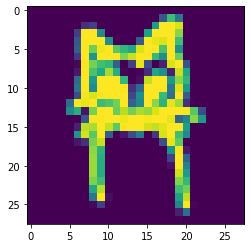

In [14]:
idx = randint(0, len(x_train))
plt.imshow(x_train[idx].reshape(28,28)) 
print(class_names[int(y_train[idx].item())])

# Preprocess the Data 

In [3]:
# Reshape and normalize
X_train = X_train.reshape(X_train.shape[0], image_size, image_size, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], image_size, image_size, 1).astype('float32')

X_train /= 255.0
X_test /= 255.0

# Convert class vectors to class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

NameError: name 'X_train' is not defined

# The Model 

In [16]:
# Define model
model = tf.keras.Sequential()
model.add(layers.Convolution2D(16, (3, 3),
                        padding='same',
                        input_shape=x_train.shape[1:], activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Convolution2D(32, (3, 3), padding='same', activation= 'relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Convolution2D(64, (3, 3), padding='same', activation= 'relu'))
model.add(layers.MaxPooling2D(pool_size =(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(100, activation='softmax')) 
# Train model
adam = tf.optimizers.Adam()
model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['top_k_categorical_accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 576)               0

# Training 

In [2]:
model.fit(X_train, y_train, validation_split=0.1, batch_size = 256, verbose=2, epochs=5)

NameError: name 'model' is not defined

# Testing 

In [16]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test accuarcy: {:0.2f}%'.format(score[1] * 100))

Test accuarcy: 92.28%


# Inference 

['book', 'drums', 'envelope', 'radio', 'bread']


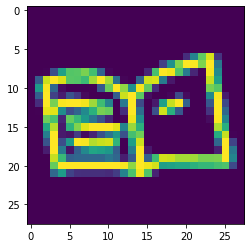

In [17]:
 
idx = randint(0, len(x_test))
img = x_test[idx]
plt.imshow(img.squeeze()) 
pred = model.predict(np.expand_dims(img, axis=0))[0]
ind = (-pred).argsort()[:5]
latex = [class_names[x] for x in ind]
print(latex)

# Store the classes 

In [18]:
with open('class_names.txt', 'w') as file_handler:
    for item in class_names:
        file_handler.write("{}\n".format(item))

# Save and Convert 

In [ ]:
model.save('keras.h5')

In [ ]:
!mkdir model
!tensorflowjs_converter --input_format keras keras.h5 model/

mkdir: cannot create directory ‘model’: File exists
/usr/local/lib/python3.6/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Zip and Download 

In [ ]:
!cp class_names.txt model/class_names.txt

In [ ]:
!zip -r model.zip model 

  adding: model/ (stored 0%)
  adding: model/group5-shard1of1 (deflated 7%)
  adding: model/model.json (deflated 82%)
  adding: model/group2-shard1of1 (deflated 7%)
  adding: model/group3-shard1of1 (deflated 7%)
  adding: model/class_names.txt (deflated 41%)
  adding: model/group1-shard1of1 (stored 0%)
  adding: model/group4-shard1of1 (deflated 7%)


In [47]:
text = np.load('pictures/npz/ant.full.npz', allow_pickle=True, encoding='latin1')
text

In [48]:
text.files

['test', 'train', 'valid']

In [49]:
text['train']

array([array([[  -1,   48,    0],
              [  22,   32,    0],
              [  12,    8,    0],
              [  15,    5,    0],
              [  11,    0,    0],
              [  13,   -5,    0],
              [  12,  -20,    0],
              [   1,  -41,    0],
              [  -7,  -23,    0],
              [  -7,   -9,    0],
              [ -19,   -9,    0],
              [ -36,   -1,    0],
              [  -7,    5,    0],
              [  -5,   13,    0],
              [   1,   19,    0],
              [   9,   10,    1],
              [ 118,  -99,    0],
              [ -16,    2,    0],
              [  -6,    4,    0],
              [ -19,   35,    0],
              [  -6,   29,    0],
              [   0,   18,    0],
              [   4,   14,    0],
              [  19,   24,    0],
              [  25,   17,    0],
              [  13,    5,    0],
              [  39,    0,    0],
              [  12,  -22,    0],
              [   3,  -16,    0],
              

In [46]:
with np.load('pictures/npz/ant.full.npz', allow_pickle=True, encoding='latin1') as data:
    train = data['train']
    valid = data['valid']
    test = data['test']

In [50]:
len(train)

108187

In [51]:
with np.load('pictures/npz/ant.npz', allow_pickle=True, encoding='latin1') as data:
    train = data['train']
    valid = data['valid']
    test = data['test']

In [52]:
len(train)

70000

In [11]:
DATA_URL = 'https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz'

path = tf.keras.utils.get_file('mnist.npz', DATA_URL)
with np.load(path) as data:
  train_examples = data['x_train']
  train_labels = data['y_train']
  test_examples = data['x_test']
  test_labels = data['y_test']


11493376/11490434 [==============================] - 1s 0us/step


In [17]:
x = np.load(path, mmap_mode='r')
for k in x.files:
    print(k)

x_test
x_train
y_train
y_test


In [21]:
x.files

['x_test', 'x_train', 'y_train', 'y_test']

In [15]:
data

In [12]:
DATA_URL

'https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz'

In [14]:
train_examples

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [23]:
len(train_examples)

60000

In [24]:
train_examples[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [25]:
train_examples[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [32]:
len(train_examples[0])

28

In [33]:
train_examples[0][0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=uint8)

In [34]:
len(train_examples[0][0])

28

In [31]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [35]:
train_labels[0]

5

In [36]:
len(train_labels)

60000